<a href="https://colab.research.google.com/github/UARR7/Image-Classification-CIFAR-100/blob/main/IMAGE_CLASSIFICATION_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"udhithakashrr","key":"aa100a5dc7fb1ee18af767ecff0a3b86"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list


ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          12907        272  1.0              
owm4096/laptop-prices                                            Laptop Prices                                        25KB  2024-09-09 12:43:01           3318         60  1.0              
taweilo/mba-admission-dataset                                    MBA Admission dataset, Class 2025                    55KB  2024-09-18 07:57:38           1380         28  1.0              
muhammadehsan02/global-football-results-18722024       

In [ ]:
!kaggle datasets download -d fedesoriano/cifar100

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cifar100
License(s): copyright-authors
 95% 153M/161M [00:03<00:00, 25.8MB/s]
100% 161M/161M [00:03<00:00, 54.8MB/s]


In [ ]:
!unzip cifar100.zip

Archive:  cifar100.zip
  inflating: file.txt                
  inflating: meta                    
  inflating: test                    
  inflating: train                   


# Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt

Before we load the data, it is required to first prepare the transformations to be applied. It is an important step to prepare the data for training to avoid overfitting problem.

In [ ]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

# Loading Data

In [ ]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

100%|██████████| 169001437/169001437 [00:18<00:00, 9077973.86it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 1.6110,  1.2210,  0.7335,  ...,  2.4495,  2.4495,  2.4495],
         [ 1.7670,  1.2405,  1.1625,  ...,  2.4495,  2.4495,  2.4495],
         [ 1.6890,  1.3380,  0.7920,  ...,  2.4300,  2.4300,  2.4300],
         ...,
         [-0.2416, -0.5731, -1.0411,  ...,  0.7530,  0.1875,  0.4605],
         [-0.1050, -0.4756, -1.0996,  ...,  0.6945,  0.4020,  0.5190],
         [-0.2026, -1.0216, -1.5676,  ...,  0.4995,  0.6945,  0.5385]],

        [[ 1.8136,  1.5767,  1.1228,  ...,  2.5833,  2.5833,  2.5833],
         [ 2.1294,  1.6557,  1.4781,  ...,  2.5833,  2.5833,  2.5833],
         [ 2.0307,  1.7149,  1.0241,  ...,  2.5636,  2.5636,  2.5636],
         ...,
         [-0.4758, -0.8903, -1.3245,  ...,  1.6162,  1.0044,  1.2610],
         [-0.2982, -0.7324, -1.3442,  ...,  1.5175,  1.2018,  1.2807],
         [-0.3179, -1.2258, -1.7784,  ...,  1.3202,  1.4583,  1.3004]],

        [[ 1.5593,  1.1526,  0.4361,  ...,  2.7600,  2.7600,  2

In [ ]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [ ]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

# BATCHSIZE & DataLoader

In [ ]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Visualization

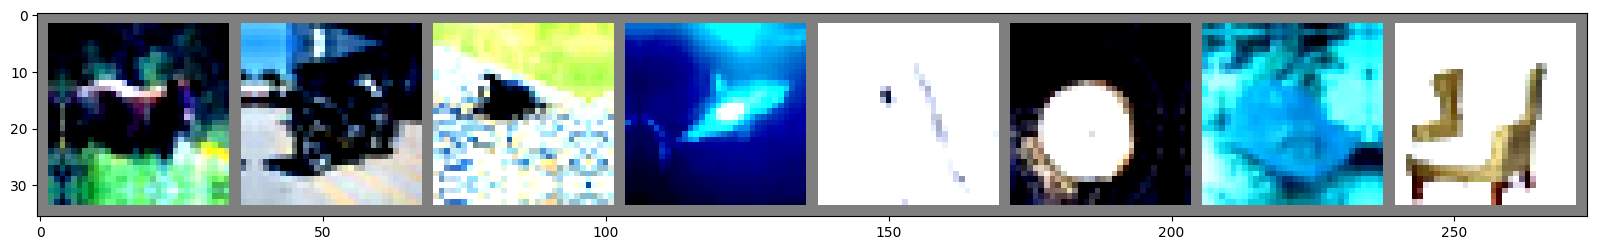

bear                motorcycle          beetle              shark               telephone           clock               ray                 chair               


In [ ]:
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_8_samples)
images, labels = next(dataiter)  # Corrected this line

# print images
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(8)))


# Get CUDA ready

In [ ]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device

    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)

    def __len__(self):
        return len(self.data)

In [ ]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [ ]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

# BaseModel

In [ ]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}

    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1,1), stride=(stride, stride)),
             nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size,stride, conv=False):
    layers = None

    first_layers = [nn.Conv2d(in_channel,out_channel[0], kernel_size=(1,1),stride=(1,1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride=(stride,stride)

    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1,1), padding=1),
                    nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers

    return nn.Sequential(*layers)


class ResNet(BaseModel):

    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.stg1 = nn.Sequential(
                                   nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3),
                                             stride=(1), padding=1),
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(inplace=True),
                                   nn.MaxPool2d(kernel_size=3, stride=2))

        ##stage 2
        self.convShortcut2 = conv_shortcut(64,256,1)

        self.conv2 = block(64,[64,256],3,1,conv=True)
        self.ident2 = block(256,[64,256],3,1)


        ##stage 3
        self.convShortcut3 = conv_shortcut(256,512,2)

        self.conv3 = block(256,[128,512],3,2,conv=True)
        self.ident3 = block(512,[128,512],3,2)


        ##stage 4
        self.convShortcut4 = conv_shortcut(512,1024,2)

        self.conv4 = block(512,[256,1024],3,2,conv=True)
        self.ident4 = block(1024,[256,1024],3,2)


        ##Classify
        self.classifier = nn.Sequential(
                                       nn.AvgPool2d(kernel_size=(4)),
                                       nn.Flatten(),
                                       nn.Linear(1024, num_classes))

    def forward(self,inputs):
        out = self.stg1(inputs)

        #stage 2
        out = F.relu(self.conv2(out) + self.convShortcut2(out))
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)

        #stage3
        out = F.relu(self.conv3(out) + (self.convShortcut3(out)))
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)

        #stage4
        out = F.relu(self.conv4(out) + (self.convShortcut4(out)))
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)

        #Classify
        out = self.classifier(out)#100x1024

        return out

In [ ]:
model = ResNet(3,100)

In [ ]:
model = to_device(model, device)

# Evaluation & Fit Function for Training

In [ ]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()

    history = []

    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)

    scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))

    for epoch in range(epochs):
        model.train()

        train_loss = []

        lrs = []

        for batch in train_dl:
            loss = model.training_step(batch)

            train_loss.append(loss)

            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs

        model.epoch_end(epoch,result)
        history.append(result)

    return history

# Hyperparameters

In [ ]:
epochs = 30
optimizer = torch.optim.Adam
max_lr = 1e-3
grad_clip = 0.1
weight_decay = 1e-5
scheduler = torch.optim.lr_scheduler.OneCycleLR

# Training

In [ ]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model,
              optimizer=optimizer, max_lr=max_lr, grad_clip=grad_clip,
              weight_decay=weight_decay, scheduler=torch.optim.lr_scheduler.OneCycleLR)

Epoch [0], last_lr: 0.00007, train_loss: 3.1495, val_loss: 4.0720, val_acc: 0.1031
Epoch [1], last_lr: 0.00015, train_loss: 2.8826, val_loss: 3.7630, val_acc: 0.1344
Epoch [2], last_lr: 0.00028, train_loss: 2.6891, val_loss: 3.0101, val_acc: 0.2508
Epoch [3], last_lr: 0.00044, train_loss: 2.5045, val_loss: 2.7051, val_acc: 0.3293
Epoch [4], last_lr: 0.00060, train_loss: 2.3779, val_loss: 2.7153, val_acc: 0.3114
Epoch [5], last_lr: 0.00076, train_loss: 2.2350, val_loss: 2.8048, val_acc: 0.3027
Epoch [6], last_lr: 0.00089, train_loss: 2.0972, val_loss: 2.4929, val_acc: 0.3593
Epoch [7], last_lr: 0.00097, train_loss: 1.9442, val_loss: 2.4461, val_acc: 0.3716
Epoch [8], last_lr: 0.00100, train_loss: 1.7830, val_loss: 2.2053, val_acc: 0.4228
Epoch [9], last_lr: 0.00099, train_loss: 1.6224, val_loss: 2.0818, val_acc: 0.4443
Epoch [10], last_lr: 0.00098, train_loss: 1.5110, val_loss: 2.0147, val_acc: 0.4776
Epoch [11], last_lr: 0.00095, train_loss: 1.4124, val_loss: 1.8575, val_acc: 0.5028
Ep

# Plotting

In [ ]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])

def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
y_true = []
y_pred = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for inputs, labels in test_dl:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU if available
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())  # Move to CPU and convert to numpy
        y_pred.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Define your class names (assuming train_data contains class names)
classes = train_data.classes


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


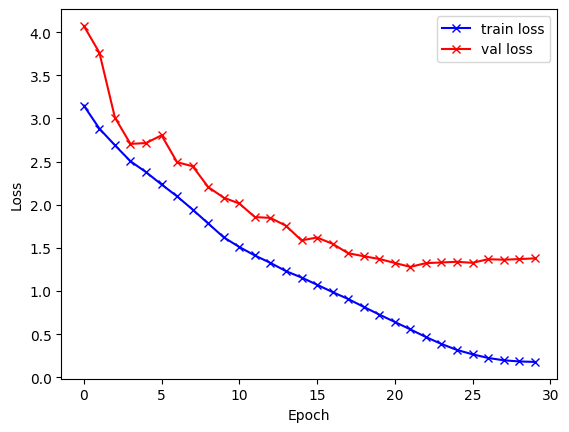

In [ ]:
plot_loss(history)

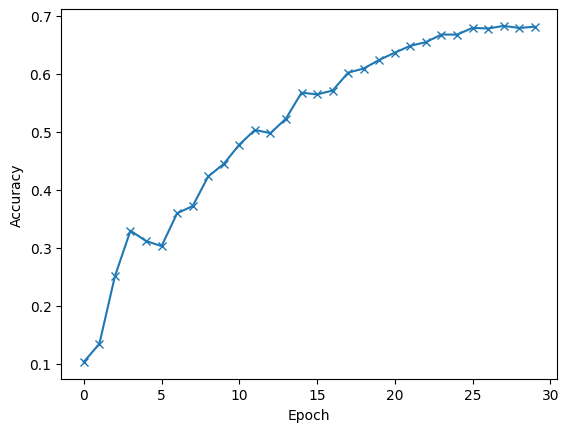

In [ ]:
plot_acc(history)

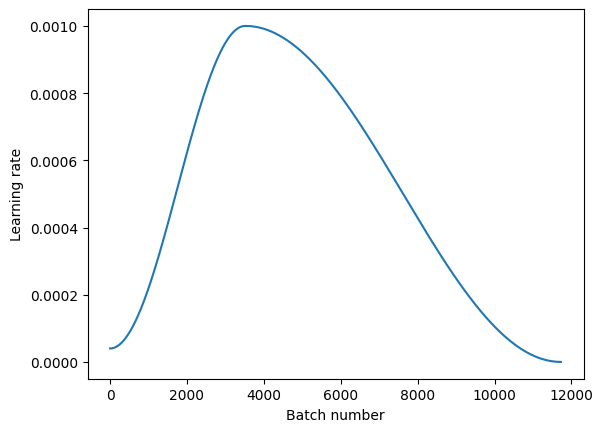

In [ ]:
plot_lrs(history)

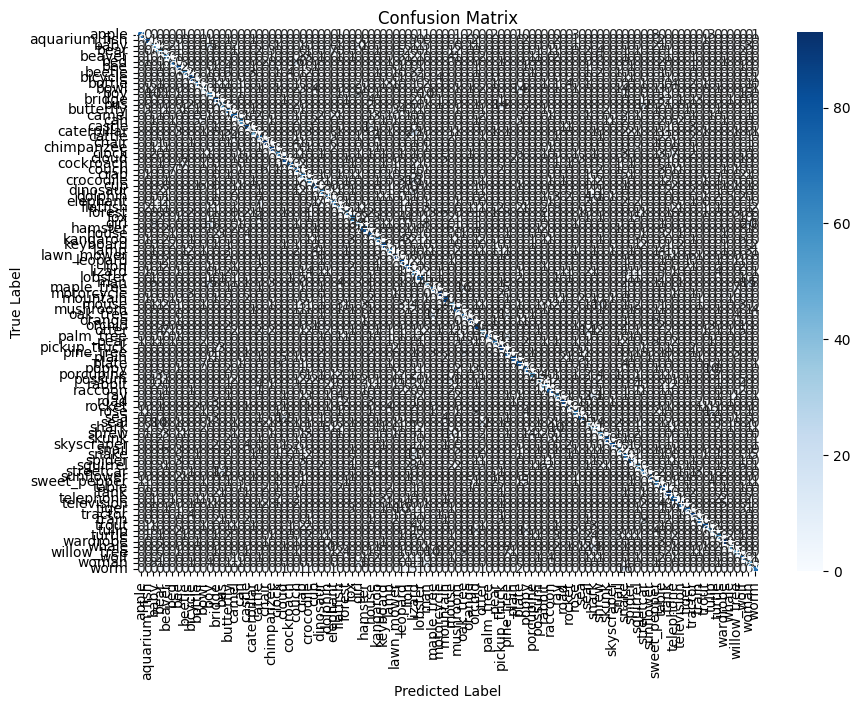

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes)

# Make predictions and see the image with its result

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Label: mountain , Predicted: road


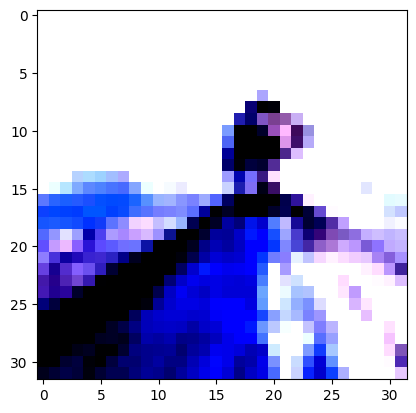

In [ ]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Label: wardrobe , Predicted: wardrobe


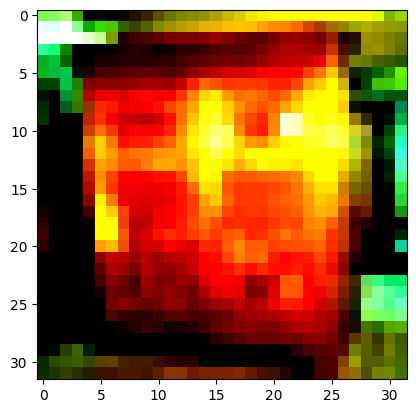

In [ ]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'cifar100-resnet-project.pth')

In [ ]:
# Load the trained model
model = ResNet(3, 100)
model.load_state_dict(torch.load('cifar100-resnet-project.pth'))  # Load the saved model weights
model.to(get_device()) # Move the model to the appropriate device
model.eval()  # Set the model to evaluation mode

<ipython-input-36-ed879e42f31c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cifar100-resnet-project.pth'))  # Load the saved model wei

ResNet(
  (stg1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convShortcut2): Sequential(
    (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (ident2): Sequential(
    (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

<ipython-input-38-231a482bbb49>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cifar100-resnet-project.pth', map_location=get_device()))

Predicted class index: 0
Predicted class: apple


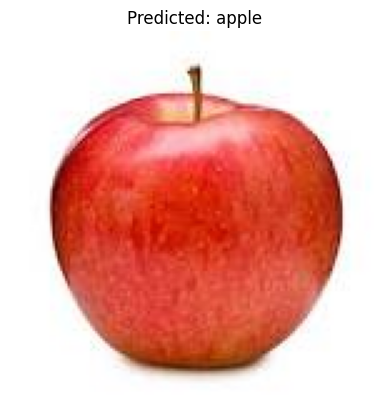

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation to be applied to the input image
def get_transform():
    stats = ((0.5074, 0.4867, 0.4411), (0.2011, 0.1987, 0.2025))  # Normalization statistics
    return transforms.Compose([
        transforms.Resize((32, 32)),  # Resize the image to the input size of the model
        transforms.ToTensor(),
        transforms.Normalize(*stats)  # Normalize with the same stats used for training
    ])

# Load the trained model
model = ResNet(3, 100)
# Load the saved model weights directly onto the appropriate device
model.load_state_dict(torch.load('cifar100-resnet-project.pth', map_location=get_device()))
model = to_device(model, get_device())  # Ensure the model is on the right device
model.eval()  # Set the model to evaluation mode

# Function to predict the class of an input image
def predict_image(img_path, model):
    # Load and preprocess the image
    img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
    img_tensor = get_transform()(img).unsqueeze(0)  # Apply transforms and add batch dimension

    # Move image tensor to the appropriate device
    img_tensor = to_device(img_tensor, get_device())

    # Make a prediction
    with torch.no_grad():
        outputs = model(img_tensor)
        _, preds = torch.max(outputs, 1)

    # Return the predicted class index
    return preds[0].item()

# Test the function with an input image path
input_image_path = 'dlimg.jpeg'  # Replace with your image path
predicted_class_index = predict_image(input_image_path, model)

# Print the predicted class label
print('Predicted class index:', predicted_class_index)
print('Predicted class:', train_data.classes[predicted_class_index])

# Display the input image
img = Image.open(input_image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.title(f'Predicted: {train_data.classes[predicted_class_index]}')
plt.show()
